## Titanic - Machine Learning from Disaster

One of the main objectives of this project is to predict the survival on the Titanic and also get more familiar  with ML basics 


### Problem Statement 
The sinking of the RMS Titanic was a tragedy that resulted in significant loss of life, raising questions about the factors that influenced survival during the disaster. With limited lifeboats available, survival was not only a matter of chance but may have been influenced by individual characteristics such as age, gender, and socio-economic class.

This project aims to build a predictive model using passenger data to answer the question:
“What factors most significantly determined a passenger’s likelihood of survival during the Titanic disaster?”

By analyzing data on passenger demographics and other characteristics, the goal is to uncover patterns and insights that can provide a better understanding of survival dynamics in crisis situations.



### Objectives

1. Build a Predictive Model: Develop a machine learning model to predict the likelihood of survival for passengers based on demographic and socio-economic data.

2. Identify Key Factors : Analyze the impact of variables such as age, gender, socio-economic class, and others to determine the most significant predictors of survival.

3. Understand Survival Patterns : Uncover trends and relationships within the data that reveal how different groups of passengers were affected during the disaster.

4. Provide Insights for Crisis Preparedness : Leverage findings to contribute to discussions on safety and evacuation protocols in similar crisis scenarios.

5. Enhance Data Science Skills : Apply data preprocessing, exploratory data analysis, feature engineering, and model evaluation techniques to a real-world dataset.

In [2522]:
#import libraries to be used in the project
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2523]:
# load the dataset 
data = pd.read_csv("Data/train.csv", index_col= False)
test_data = pd.read_csv("Data/test.csv", index_col= False)
print(data.head(1))
print(test_data.head(1))

   PassengerId  Survived  Pclass                     Name   Sex   Age  SibSp  \
0            1         0       3  Braund, Mr. Owen Harris  male  22.0      1   

   Parch     Ticket  Fare Cabin Embarked  
0      0  A/5 21171  7.25   NaN        S  
   PassengerId  Pclass              Name   Sex   Age  SibSp  Parch  Ticket  \
0          892       3  Kelly, Mr. James  male  34.5      0      0  330911   

     Fare Cabin Embarked  
0  7.8292   NaN        Q  


In [2524]:
#check data info 
data.info()
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

From the output above, there are 12 columns and some columns have null values such as in age and cabin. The datatypes in the dataset have both numerical and categorical values

In [2525]:
print(data.describe())
print(test_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


In [2526]:
#let us handle the null values 
print(data.isnull().sum() / len(data) *100)
print(test_data.isnull().sum() / len(test_data) *100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64


In [2527]:
#the cabin column has ~ 77% and 78% of the rows missing values in both datasets, I will drop that column as it wont have much of a 
#significance 
data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)


In [2528]:
print(data.isna().sum() / len(data) * 100)
print(test_data.isna().sum() / len(test_data) * 100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Embarked        0.000000
dtype: float64


In [2529]:
 #impute the age column with the median value in both datasets
print(data['Age'].fillna(data['Age'].median(), inplace= True))
print(test_data['Age'].fillna(test_data['Age'].median(), inplace= True))

None
None


In [2530]:
#impute the rows in the embarked  column with the mode value
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace= True)



In [2531]:
#test data has a missing value in the fare column, I will impute it with the median value
test_data['Fare'].fillna(test_data['Fare'].median(), inplace= True)

In [2532]:
print(data.isna().sum())

print(test_data.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [2533]:
titanic_data = data

In [2534]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [2535]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [2536]:
# Check for duplicates in the dataset
duplicate_rows = titanic_data[titanic_data.duplicated()]


# Print the number of duplicate rows
print(f'Number of duplicate rows: {duplicate_rows.shape[0]}')

Number of duplicate rows: 0


In [2537]:
# Check for duplicates in the dataset
duplicate_rows2 = test_data[test_data.duplicated()]


# Print the number of duplicate rows
print(f'Number of duplicate rows: {duplicate_rows2.shape[0]}')

Number of duplicate rows: 0


### Check for outliers 



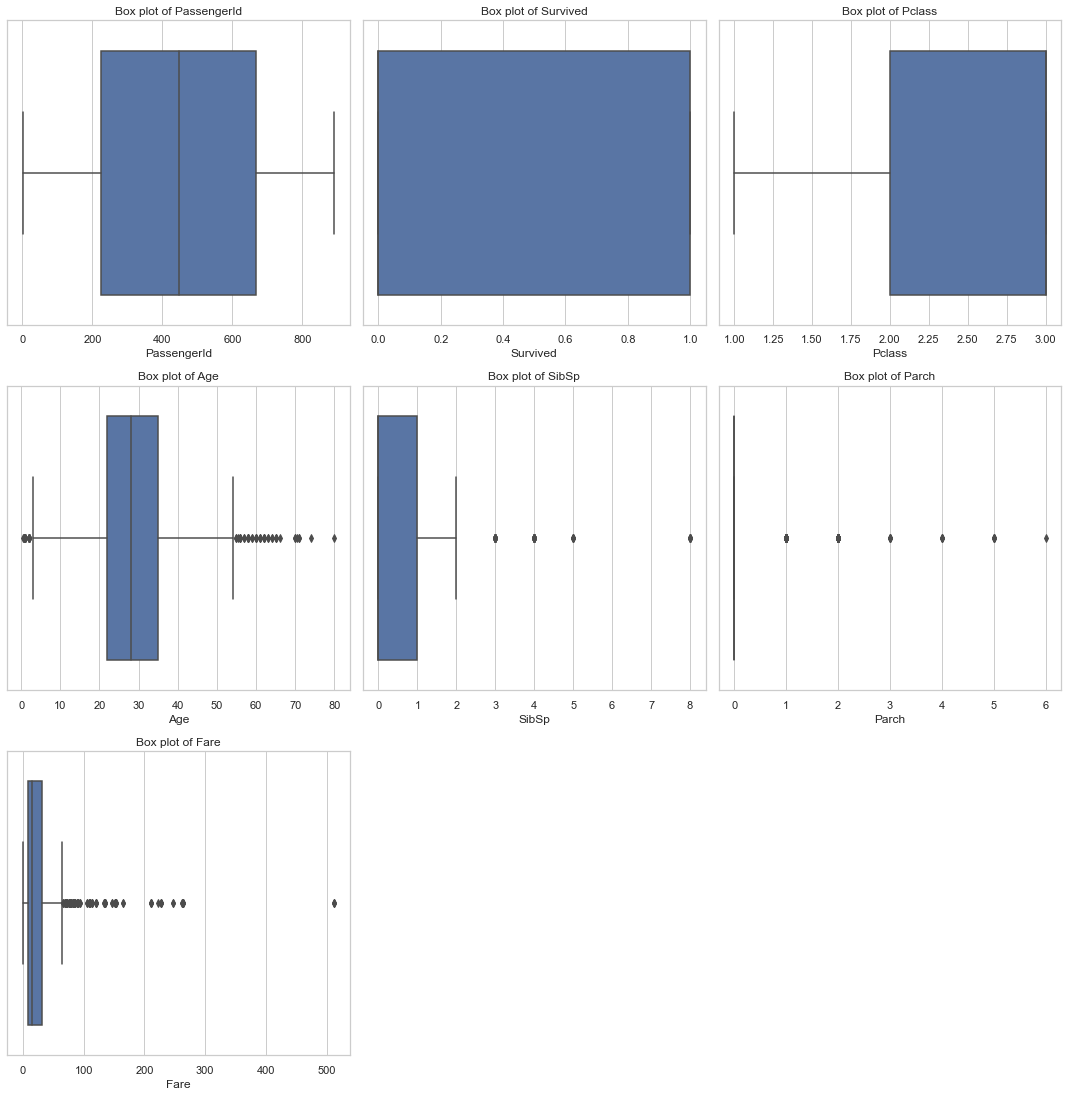

In [2538]:
#check for outliers
#use box plots to check for the numerical columns in the dataset 
import seaborn as sns
# Set the size of the plots
plt.figure(figsize=(15, 20))

# Loop through each numerical column and create a box plot
for i, column in enumerate(titanic_data.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(len(titanic_data.columns) // 3 + 1, 3, i)
    sns.boxplot(x=titanic_data[column])
    plt.title(f'Box plot of {column}')
    plt.tight_layout()

plt.show()

## Exploratory Data Analysis 

### Univariate Analysis

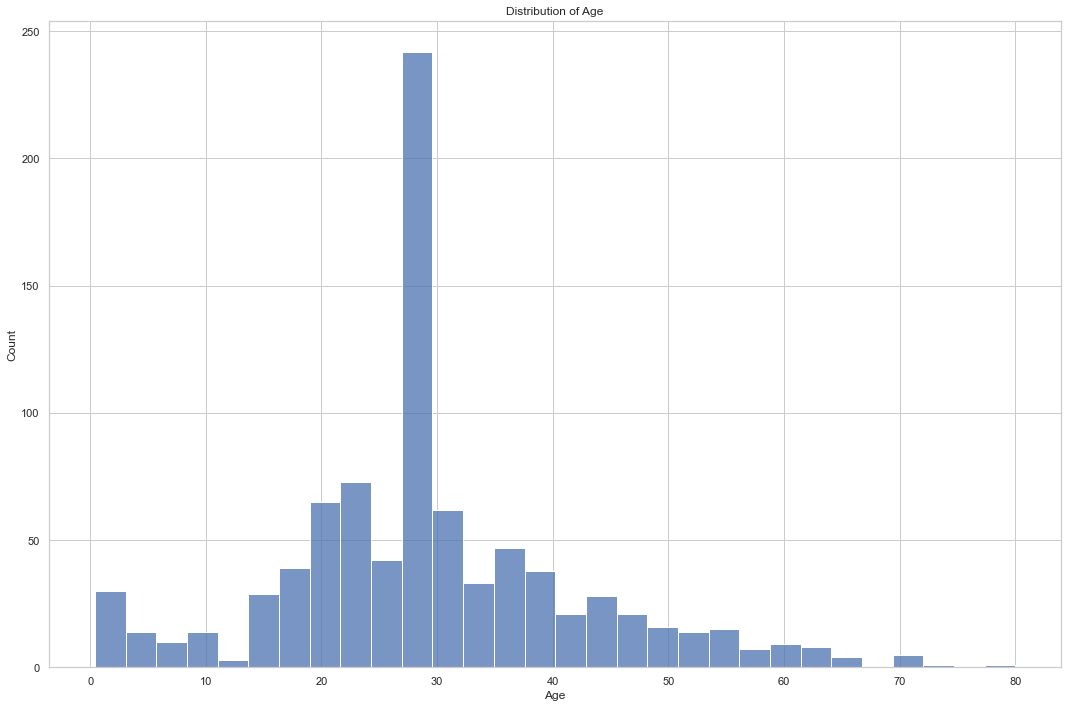

In [2539]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Univariate analysis of numerical features
#numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

plt.figure(figsize=(15, 10))
sns.histplot(titanic_data['Age'])
plt.title(f'Distribution of Age')
plt.tight_layout()
plt.show()

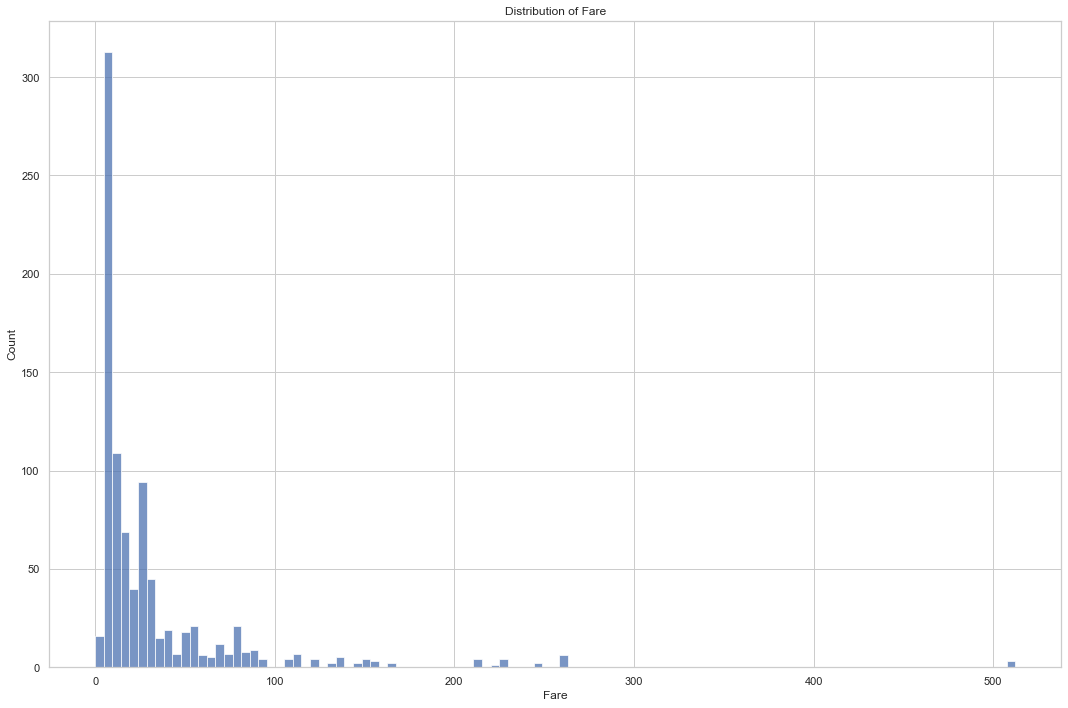

In [2540]:
# Univariate analysis of numerical features

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Univariate analysis of numerical features
#numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

plt.figure(figsize=(15, 10))
sns.histplot(titanic_data['Fare'])
plt.title(f'Distribution of Fare')
plt.tight_layout()
plt.show()

From the histogram above there seems to be an outlier in the fare prices. Further research can be done to establish how much the fare costed to prove the outlier. After research, the average first class ticket costed roughly 400 dollars, hence there may have been a typing error to have a ticket costing more than 500 dollars. 
The outlier will be removed.  

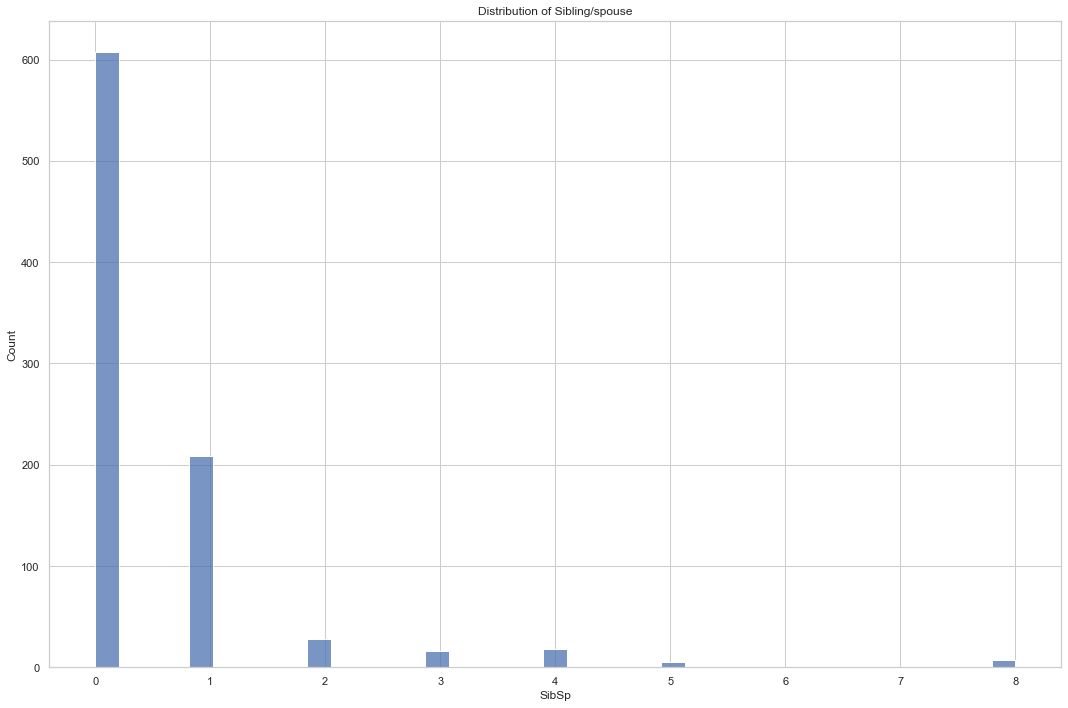

In [2541]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Univariate analysis of numerical features
#numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

plt.figure(figsize=(15, 10))
sns.histplot(titanic_data['SibSp'])
plt.title(f'Distribution of Sibling/spouse')
plt.tight_layout()
plt.show()

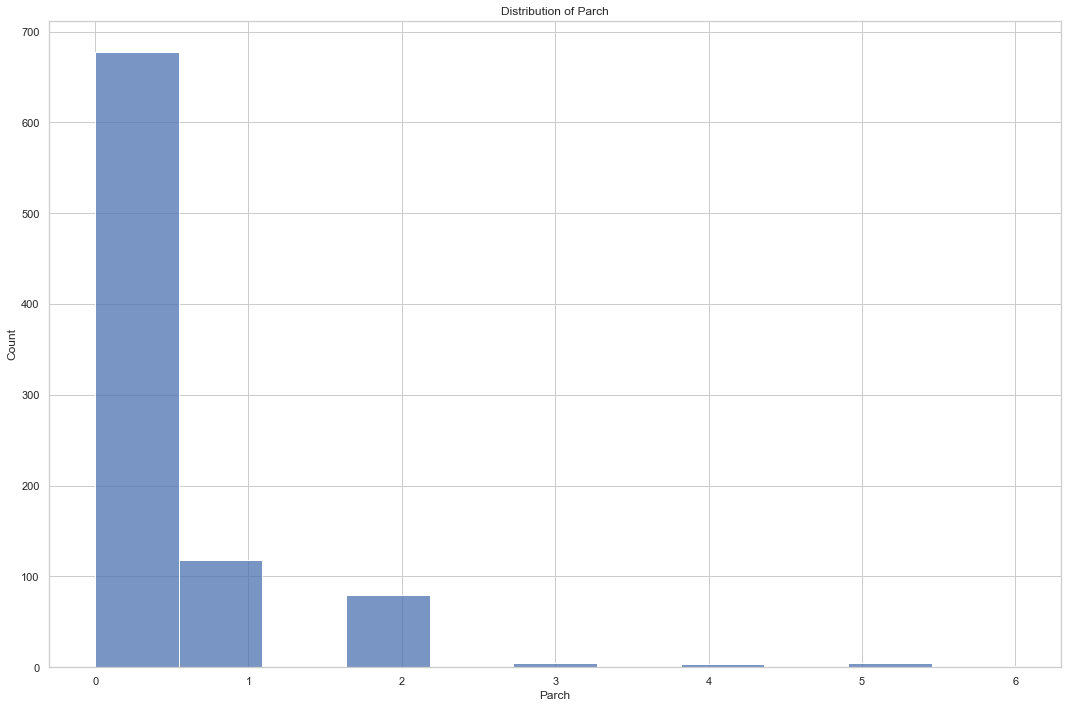

In [2542]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Univariate analysis of numerical features
#numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

plt.figure(figsize=(15, 10))
sns.histplot(titanic_data['Parch'])
plt.title(f'Distribution of Parch')
plt.tight_layout()
plt.show()

### Categorical Features Analysis -sex, ticket, embarked 

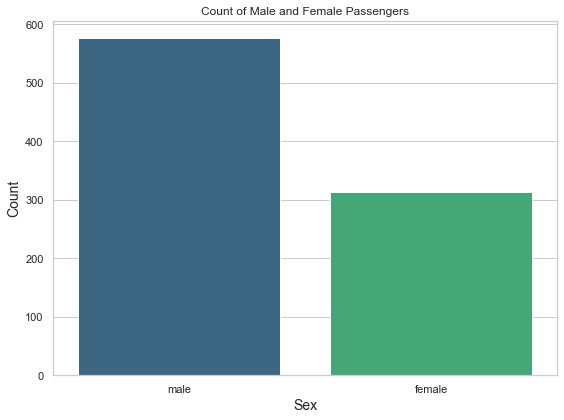

In [2543]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=titanic_data, palette='viridis') 
plt.title(f'Count of Male and Female Passengers')
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

The ticket column is of an object datatype - which contains strings and numbers. I  was curious about how this column had any impact on the survival rate of the passengers or its overall importance in the dataset. Could it be that passengers who had tickets with a certain prefix survived more than others without? 

In [2544]:
# Extract prefixes and numeric components
titanic_data['Ticket_Prefix'] = titanic_data['Ticket'].str.extract(r'([A-Za-z./]+)').fillna('None')
titanic_data['Ticket_Number'] = titanic_data['Ticket'].str.extract(r'(\d+)$')

# Analyze prefix distribution
print(titanic_data['Ticket_Prefix'].value_counts())



# Drop the original Ticket column if not needed
#titanic_data.drop('Ticket', axis=1, inplace=True)


Ticket_Prefix
None          661
PC             60
C.A.           27
A/             23
STON/O         18
W./C.           9
CA.             8
SOTON/O.Q.      8
SOTON/OQ        7
CA              6
C               5
F.C.C.          5
SC/PARIS        5
S.O.C.          5
SC/Paris        4
LINE            4
S.O./P.P.       3
PP              3
SC/AH           3
S.C./PARIS      2
P/PP            2
SOTON/O         2
A./             2
A.              2
WE/P            2
S.W./PP         1
F.C.            1
A/S             1
SC              1
S.O.P.          1
SCO/W           1
SW/PP           1
W/C             1
Fa              1
A               1
W.E.P.          1
SO/C            1
S.P.            1
S.C./A.         1
C.A./SOTON      1
Name: count, dtype: int64


In [2545]:
# Extract prefixes and numeric components for the test data
test_data['Ticket_Prefix'] = test_data['Ticket'].str.extract(r'([A-Za-z./]+)').fillna('None')
test_data['Ticket_Number'] = test_data['Ticket'].str.extract(r'(\d+)$')


In [2546]:
# Check correlation between prefix and survival
prefix_survival = titanic_data.groupby('Ticket_Prefix')['Survived'].mean()
print(prefix_survival)

Ticket_Prefix
A             0.000000
A.            0.000000
A./           0.000000
A/            0.086957
A/S           0.000000
C             0.400000
C.A.          0.481481
C.A./SOTON    0.000000
CA            0.000000
CA.           0.125000
F.C.          0.000000
F.C.C.        0.800000
Fa            0.000000
LINE          0.250000
None          0.384266
P/PP          0.500000
PC            0.650000
PP            0.666667
S.C./A.       0.000000
S.C./PARIS    0.500000
S.O./P.P.     0.000000
S.O.C.        0.000000
S.O.P.        0.000000
S.P.          0.000000
S.W./PP       1.000000
SC            1.000000
SC/AH         0.666667
SC/PARIS      0.400000
SC/Paris      0.500000
SCO/W         0.000000
SO/C          1.000000
SOTON/O       0.000000
SOTON/O.Q.    0.125000
SOTON/OQ      0.142857
STON/O        0.444444
SW/PP         1.000000
W./C.         0.111111
W.E.P.        0.000000
W/C           0.000000
WE/P          0.500000
Name: Survived, dtype: float64


From the output above, prefixes might correlate with the socio-economic status - PC paddengers might have higher fares and better survival rates
I will group less common prefixes avoiding overfitting and provides cleaner insights, then encode them  to use in the model.

In [2547]:
# group and simplify prefixes
# frequent_prefixes = titanic_data['Ticket_Prefix'].value_counts()[titanic_data['Ticket_Prefix'].value_counts() > 10].index
titanic_data['Ticket_Prefix_Grouped'] = titanic_data['Ticket_Prefix'].apply(
    lambda x: x if x in frequent_prefixes else 'Other'
)
titanic_data.head(10)

#for the test data

test_data['Ticket_Prefix_Grouped'] = test_data['Ticket_Prefix'].apply(
    lambda x: x if x in frequent_prefixes else 'Other'
)

In [2548]:
# analyze grouped prefixes - survival rate for grouped prefixes
grouped_prefix_survival = titanic_data.groupby('Ticket_Prefix_Grouped')['Survived'].mean()
print(grouped_prefix_survival)
titanic_data.info()


Ticket_Prefix_Grouped
A/        0.086957
C.A.      0.481481
None      0.384266
Other     0.254902
PC        0.650000
STON/O    0.444444
Name: Survived, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PassengerId            891 non-null    int64  
 1   Survived               891 non-null    int64  
 2   Pclass                 891 non-null    int64  
 3   Name                   891 non-null    object 
 4   Sex                    891 non-null    object 
 5   Age                    891 non-null    float64
 6   SibSp                  891 non-null    int64  
 7   Parch                  891 non-null    int64  
 8   Ticket                 891 non-null    object 
 9   Fare                   891 non-null    float64
 10  Embarked               891 non-null    object 
 11  Ticket_Prefix          891 non-null    object 


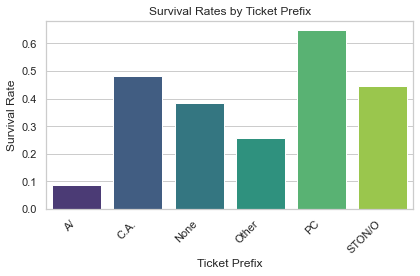

In [2549]:
#visualize survival rate by prefix
survival_by_prefix = titanic_data.groupby('Ticket_Prefix_Grouped')['Survived'].mean().reset_index()
sns.barplot(x='Ticket_Prefix_Grouped', y='Survived', data=survival_by_prefix, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Survival Rates by Ticket Prefix')
plt.xlabel('Ticket Prefix')
plt.ylabel('Survival Rate')
plt.tight_layout()
plt.show()


### Bivariate Analysis

In [2562]:
# what is the mean age of survivors?
survivors = titanic_data[titanic_data['Survived']== 1]


# mean age 
mean_survior_age = survivors['Age'].mean()
print(f"Overall mean of survivors age is {mean_survior_age:.2f} years")


Overall mean of survivors age is 28.29 years


In [2563]:
#mean age of survivors by gender and calculate mean age for each grouped_prefix_survival
mean_age_by_gender = survivors.groupby('Sex')['Age'].mean()
print("Mean age of survivors by gender:")
print(mean_age_by_gender)

Mean age of survivors by gender:
Sex
female    28.716738
male      27.382294
Name: Age, dtype: float64


In [2558]:

# Calculate survival percentages by gender
gender_survival = titanic_data.groupby('Sex')['Survived'].value_counts(normalize=True).unstack() * 100
print(gender_survival)


Survived          0          1
Sex                           
female    25.796178  74.203822
male      81.109185  18.890815


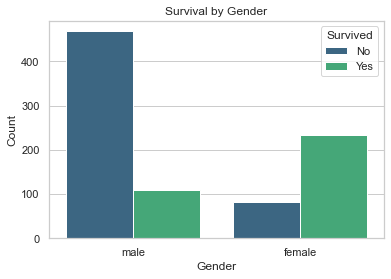

In [2561]:
# Create the count plot with percentages
sns.countplot(data=titanic_data, x='Sex', hue='Survived', palette='viridis')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


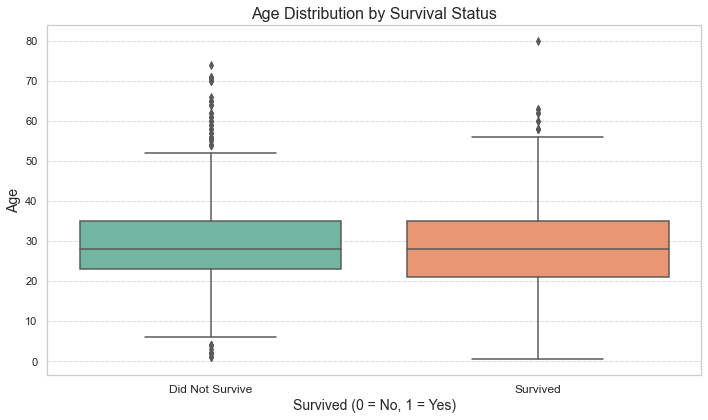

In [2437]:
# Boxplot to compare age distribution of survivors and non-survivors
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=titanic_data, palette='Set2')

# Customizing the plot
plt.title('Age Distribution by Survival Status', fontsize=16)
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Did Not Survive', 'Survived'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

### Multivariate analysis

In [2438]:
#Pivot Table: Survival rates by Pclass and Sex
pivot_table = titanic_data.pivot_table(values='Survived', index='Pclass', columns='Sex', aggfunc='mean')
print("Survival Rates by Pclass and Sex:")
print(pivot_table)

Survival Rates by Pclass and Sex:
Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


In [2439]:
#Pivot Table: Survival rates by Pclass and Sex
pivot_table = titanic_data.pivot_table(values='Survived', index='Pclass',  aggfunc='mean')
print("Survival Rates by Pclass:")
print(pivot_table)

Survival Rates by Pclass:
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


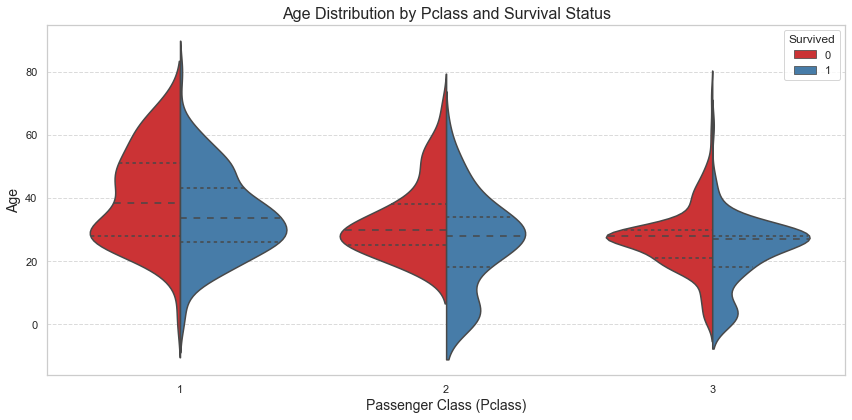

In [ ]:
#"What is the age distribution of passengers across different classes based on their survival status?
# # 2. Visualization: Survival by Pclass, Sex, and Age
plt.figure(figsize=(12, 6))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=titanic_data, inner='quart',split=True, palette='Set1')

# Customizing the plot
plt.title('Age Distribution by Pclass and Survival Status', fontsize=16)
plt.xlabel('Passenger Class (Pclass)', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



Embarkation Port Analysis

Do passengers embarking from certain ports have significantly different survival outcomes, and is this related to fare?

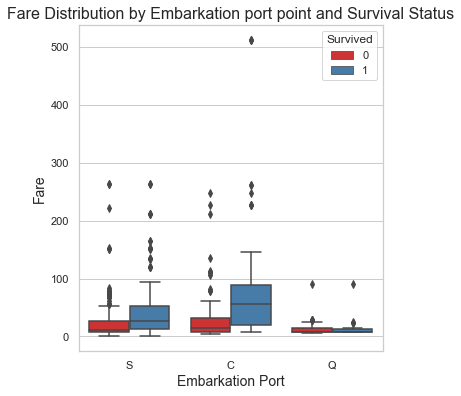

In [ ]:
# Did those who embarked at different points have different survival rates, and how does it relate with fare?
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Embarked', y='Fare', hue='Survived', data=titanic_data, palette='Set1')

# Customizing the plot
plt.title('Fare Distribution by Embarkation port point and Survival Status', fontsize=16)
plt.xlabel('Embarkation Port', fontsize=14)
plt.ylabel('Fare', fontsize=14)
plt.legend(title='Survived', loc='upper right')
plt.show()

Survival Analysis across Age and Fare Buckets

Are younger passengers in higher fare ranges more likely to survive? 

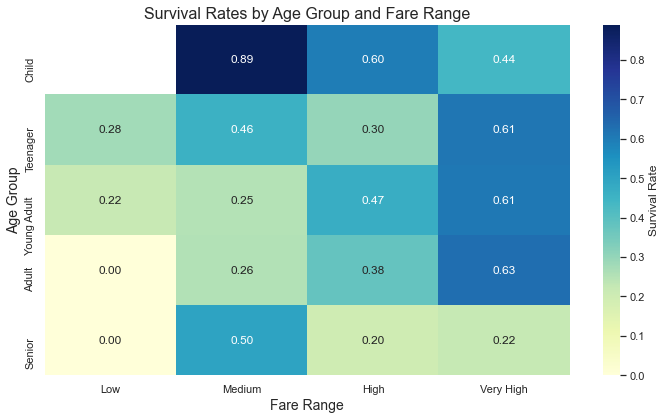

In [ ]:
# Create age bins
titanic_data['AgeGroup'] = pd.cut(
    titanic_data['Age'], 
    bins=[0, 12, 18, 35, 60, 80], 
    labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
)
#for test data
test_data['AgeGroup'] = pd.cut(
    test_data['Age'], 
    bins=[0, 12, 18, 35, 60, 80], 
    labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
)

# Create fare bins
titanic_data['FareRange'] = pd.qcut(titanic_data['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Create fare bins for test data
test_data['FareRange'] = pd.qcut(test_data['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Calculate survival rates by AgeGroup and FareRange
survival_rates = titanic_data.groupby(['AgeGroup', 'FareRange'])['Survived'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(survival_rates, annot=True, cmap='YlGnBu', fmt=".2f", cbar_kws={'label': 'Survival Rate'})

# Customizing the plot
plt.title('Survival Rates by Age Group and Fare Range', fontsize=16)
plt.xlabel('Fare Range', fontsize=14)
plt.ylabel('Age Group', fontsize=14)

plt.tight_layout()
plt.show()

Correlation Matrix 

 Do larger families (higher SibSp and Parch) tend to have higher or lower survival rates?

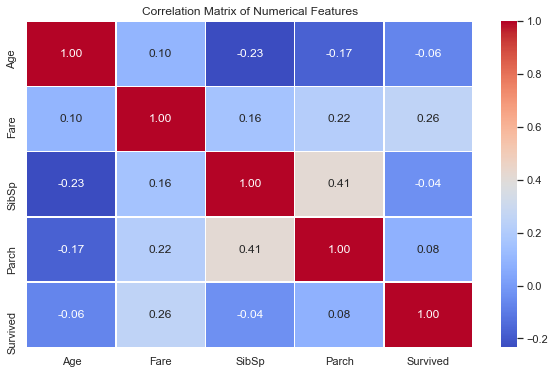

Correlation between SibSp and Parch: 0.41483769862015624
Correlation between Survived and SibSp: -0.03532249888573556
Correlation between Survived and Parch: 0.08162940708348335


In [2443]:
# Numerical features for analysis
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch', 'Survived']

# Compute the correlation matrix
correlation_matrix = titanic_data[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Analysis: Check correlation values between SibSp, Parch, and Survived
sibsp_parch_corr = correlation_matrix.loc['SibSp', 'Parch']
survived_sibsp_corr = correlation_matrix.loc['Survived', 'SibSp']
survived_parch_corr = correlation_matrix.loc['Survived', 'Parch']

print("Correlation between SibSp and Parch:", sibsp_parch_corr)
print("Correlation between Survived and SibSp:", survived_sibsp_corr)
print("Correlation between Survived and Parch:", survived_parch_corr)

from the heatmap above, the table is mostly blue, indicating the features have no high corelation hence weak collinearity

### Feature Engineering

In [2444]:
#backup original dataframe 
titanic_data =titanic_data.copy()

In [2445]:
#Combine SibSp and Parch into a single feature
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_Prefix,Ticket_Number,Ticket_Prefix_Grouped,AgeGroup,FareRange,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,A/,21171,A/,Young Adult,Low,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,PC,17599,PC,Adult,Very High,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,STON/O,3101282,STON/O,Young Adult,Medium,1


In [2446]:
#Combine SibSp and Parch into a single feature - for the test_data.
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_Prefix,Ticket_Number,Ticket_Prefix_Grouped,AgeGroup,FareRange,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,None,330911,None,Young Adult,Low,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,None,363272,None,Adult,Low,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,None,240276,None,Senior,Medium,1


In [2447]:
#extract the titles from the names- titles indicate social status or agr group, affecting survival chances 
titanic_data['Title'] = titanic_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
titanic_data.head(2)

#for the test data
test_data['Title'] = test_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
print(test_data.head(2))

   PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   

   Parch  Ticket    Fare Embarked Ticket_Prefix Ticket_Number  \
0      0  330911  7.8292        Q          None        330911   
1      0  363272  7.0000        S          None        363272   

  Ticket_Prefix_Grouped     AgeGroup FareRange  FamilySize Title  
0                  None  Young Adult       Low           1    Mr  
1                  None        Adult       Low           2   Mrs  


In [2448]:
print(titanic_data['Title'].value_counts())


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


In [2449]:
rare_titles = ['Master', "Lady", 'Mme', 'Countess','Capt', 'Sir', 'Col', 'Don', 'Dr', 'Major','Ms', 'Rev', 'Sir', 'Jonkheer', 'Mlle']

titanic_data['Title'] = titanic_data['Title'].replace(rare_titles, 'Rare')
titanic_data['Title'] = titanic_data['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

#test data
rare_titles = ['Master', "Lady", 'Mme', 'Countess','Capt', 'Sir', 'Col', 'Don', 'Dr', 'Major','Ms', 'Rev', 'Sir', 'Jonkheer', 'Mlle']

test_data['Title'] = test_data['Title'].replace(rare_titles, 'Rare')
test_data['Title'] = test_data['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})


In [2450]:
print(titanic_data['Title'].value_counts())


Title
Mr      517
Miss    182
Mrs     125
Rare     67
Name: count, dtype: int64


In [2451]:
title_survival_rate = titanic_data.groupby('Title')['Survived'].mean()
print(title_survival_rate)




Title
Miss    0.697802
Mr      0.156673
Mrs     0.792000
Rare    0.522388
Name: Survived, dtype: float64


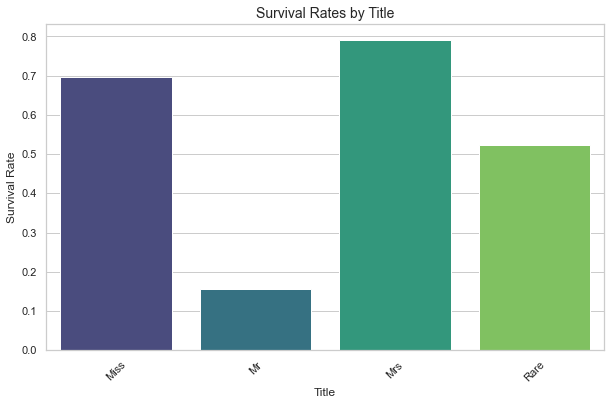

In [2452]:


plt.figure(figsize=(10, 6))
sns.barplot(x=title_survival_rate.index, y=title_survival_rate.values, palette='viridis')
plt.title('Survival Rates by Title', fontsize=14)
plt.ylabel('Survival Rate', fontsize=12)
plt.xlabel('Title', fontsize=12)
plt.xticks(rotation=45)
plt.show()


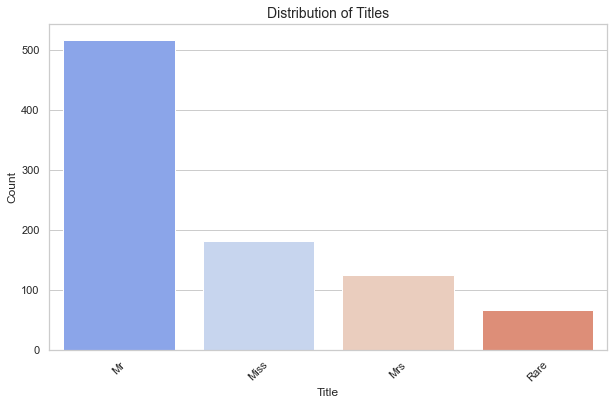

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Title', data=titanic_data, palette='coolwarm', order=titanic_data['Title'].value_counts().index)
plt.title('Distribution of Titles', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Title', fontsize=12)
plt.xticks(rotation=45)
plt.show()


<Figure size 864x432 with 0 Axes>

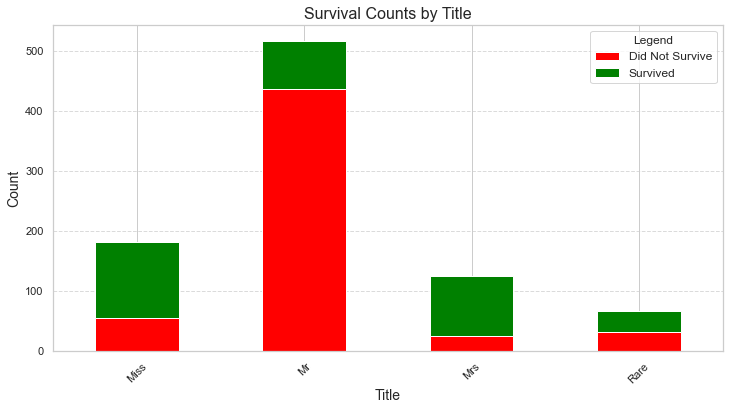

In [ ]:
# Group data by 'Title' and 'Survived'
title_survival_counts =titanic_data.groupby(['Title', 'Survived']).size().unstack()

# Plot the data
plt.figure(figsize=(12, 6))
title_survival_counts.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(12, 6))
plt.title('Survival Counts by Title', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Title', fontsize=14)
plt.xticks(rotation=45)
plt.legend(['Did Not Survive', 'Survived'], title='Legend', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [2455]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   PassengerId            891 non-null    int64   
 1   Survived               891 non-null    int64   
 2   Pclass                 891 non-null    int64   
 3   Name                   891 non-null    object  
 4   Sex                    891 non-null    object  
 5   Age                    891 non-null    float64 
 6   SibSp                  891 non-null    int64   
 7   Parch                  891 non-null    int64   
 8   Ticket                 891 non-null    object  
 9   Fare                   891 non-null    float64 
 10  Embarked               891 non-null    object  
 11  Ticket_Prefix          891 non-null    object  
 12  Ticket_Number          887 non-null    object  
 13  Ticket_Prefix_Grouped  891 non-null    object  
 14  AgeGroup               891 non-null    cat

In [2456]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   PassengerId            418 non-null    int64   
 1   Pclass                 418 non-null    int64   
 2   Name                   418 non-null    object  
 3   Sex                    418 non-null    object  
 4   Age                    418 non-null    float64 
 5   SibSp                  418 non-null    int64   
 6   Parch                  418 non-null    int64   
 7   Ticket                 418 non-null    object  
 8   Fare                   418 non-null    float64 
 9   Embarked               418 non-null    object  
 10  Ticket_Prefix          418 non-null    object  
 11  Ticket_Number          418 non-null    object  
 12  Ticket_Prefix_Grouped  418 non-null    object  
 13  AgeGroup               418 non-null    category
 14  FareRange              418 non-null    cat

In [2457]:
#titanic_data.drop(['Name', 'Ticket', 'Ticket_Prefix', 'Ticket_Number'], axis=1, inplace=True)
titanic_data['Pclass'] =titanic_data['Pclass'].astype(str)

#covert the pclass into string in order to categorize it
test_data['Pclass'] =test_data['Pclass'].astype(str)

In [2458]:
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])


In [2459]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   PassengerId            891 non-null    int64   
 1   Survived               891 non-null    int64   
 2   Pclass                 891 non-null    object  
 3   Name                   891 non-null    object  
 4   Sex                    891 non-null    object  
 5   Age                    891 non-null    float64 
 6   SibSp                  891 non-null    int64   
 7   Parch                  891 non-null    int64   
 8   Ticket                 891 non-null    object  
 9   Fare                   891 non-null    float64 
 10  Embarked               891 non-null    object  
 11  Ticket_Prefix          891 non-null    object  
 12  Ticket_Number          887 non-null    object  
 13  Ticket_Prefix_Grouped  891 non-null    object  
 14  AgeGroup               891 non-null    cat

In [2460]:
titanic_data.isnull().sum() / len(titanic_data) * 100


PassengerId              0.000000
Survived                 0.000000
Pclass                   0.000000
Name                     0.000000
Sex                      0.000000
Age                      0.000000
SibSp                    0.000000
Parch                    0.000000
Ticket                   0.000000
Fare                     0.000000
Embarked                 0.000000
Ticket_Prefix            0.000000
Ticket_Number            0.448934
Ticket_Prefix_Grouped    0.000000
AgeGroup                 0.000000
FareRange                0.000000
FamilySize               0.000000
Title                    0.000000
dtype: float64

I have missing values in the ticket_number columns - the best approach is to drop the column that has 44% of rows with missing values 

In [2461]:
#drop the column
# Drop the identified columns
titanic_data.drop(columns='Ticket_Number', inplace=True)
test_data.drop(columns='Ticket_Number', inplace=True)


In [2462]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   PassengerId            891 non-null    int64   
 1   Survived               891 non-null    int64   
 2   Pclass                 891 non-null    object  
 3   Name                   891 non-null    object  
 4   Sex                    891 non-null    object  
 5   Age                    891 non-null    float64 
 6   SibSp                  891 non-null    int64   
 7   Parch                  891 non-null    int64   
 8   Ticket                 891 non-null    object  
 9   Fare                   891 non-null    float64 
 10  Embarked               891 non-null    object  
 11  Ticket_Prefix          891 non-null    object  
 12  Ticket_Prefix_Grouped  891 non-null    object  
 13  AgeGroup               891 non-null    category
 14  FareRange              891 non-null    cat

In [2463]:
test_data.isnull().sum() / len(test_data) * 100

PassengerId              0.0
Pclass                   0.0
Name                     0.0
Sex                      0.0
Age                      0.0
SibSp                    0.0
Parch                    0.0
Ticket                   0.0
Fare                     0.0
Embarked                 0.0
Ticket_Prefix            0.0
Ticket_Prefix_Grouped    0.0
AgeGroup                 0.0
FareRange                0.0
FamilySize               0.0
Title                    0.0
dtype: float64

### Preprocessing 

Before modelling the data, I need to make sure that the data is clean, structured and ready for machine learning algorithms.

In [2464]:
# 1. Handle Categorical Variables using one hot encoding. Pclass, Sex, Embarked, Ticket_prefix_Grouped, Title,
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Pclass', 'Embarked', 'Title', 'Ticket_Prefix_Grouped' ], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Pclass', 'Embarked', 'Title', 'Ticket_Prefix_Grouped' ], drop_first=True)


In [2465]:
# 2. Drop the irrelevant object columns 
titanic_data.drop(columns=['Name', 'Ticket',  'Ticket_Prefix', 'AgeGroup', 'FareRange'], inplace=True)
test_data.drop(columns=['Name', 'Ticket',  'Ticket_Prefix', 'AgeGroup', 'FareRange'], inplace=True)

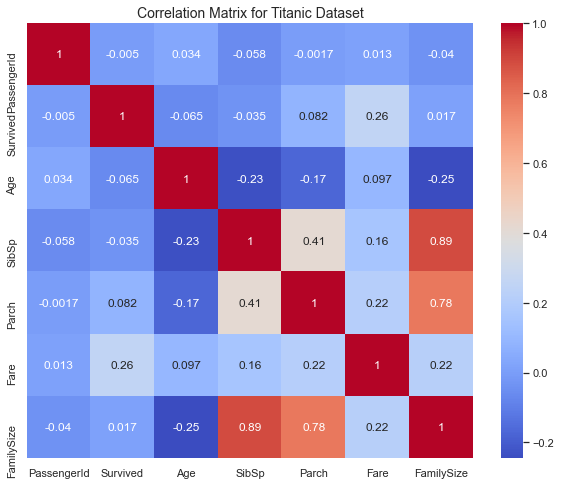

In [2466]:
# 3. Check for Multicollinearity
# Filter for numeric columns only
numeric_data = titanic_data.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = numeric_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Titanic Dataset', fontsize=14)
plt.show()


from the heat map above, it appears that 'Sibsp', 'Parch', and 'FamilySize' are highly correlated, hence their collinearity is high as well. 
The best approach would be to drop the 'Sibsp', 'Parch'

In [2467]:
# Drop SibSp and Parch, keeping FamilySize
titanic_data = titanic_data.drop(['SibSp', 'Parch'], axis=1)
test_data = test_data.drop(['SibSp', 'Parch'], axis=1)


In [2468]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PassengerId                   891 non-null    int64  
 1   Survived                      891 non-null    int64  
 2   Age                           891 non-null    float64
 3   Fare                          891 non-null    float64
 4   FamilySize                    891 non-null    int64  
 5   Sex_male                      891 non-null    bool   
 6   Pclass_2                      891 non-null    bool   
 7   Pclass_3                      891 non-null    bool   
 8   Embarked_Q                    891 non-null    bool   
 9   Embarked_S                    891 non-null    bool   
 10  Title_Mr                      891 non-null    bool   
 11  Title_Mrs                     891 non-null    bool   
 12  Title_Rare                    891 non-null    bool   
 13  Ticke

In [2469]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PassengerId                   418 non-null    int64  
 1   Age                           418 non-null    float64
 2   Fare                          418 non-null    float64
 3   FamilySize                    418 non-null    int64  
 4   Sex_male                      418 non-null    bool   
 5   Pclass_2                      418 non-null    bool   
 6   Pclass_3                      418 non-null    bool   
 7   Embarked_Q                    418 non-null    bool   
 8   Embarked_S                    418 non-null    bool   
 9   Title_Miss                    418 non-null    bool   
 10  Title_Mr                      418 non-null    bool   
 11  Title_Mrs                     418 non-null    bool   
 12  Title_Rare                    418 non-null    bool   
 13  Ticke

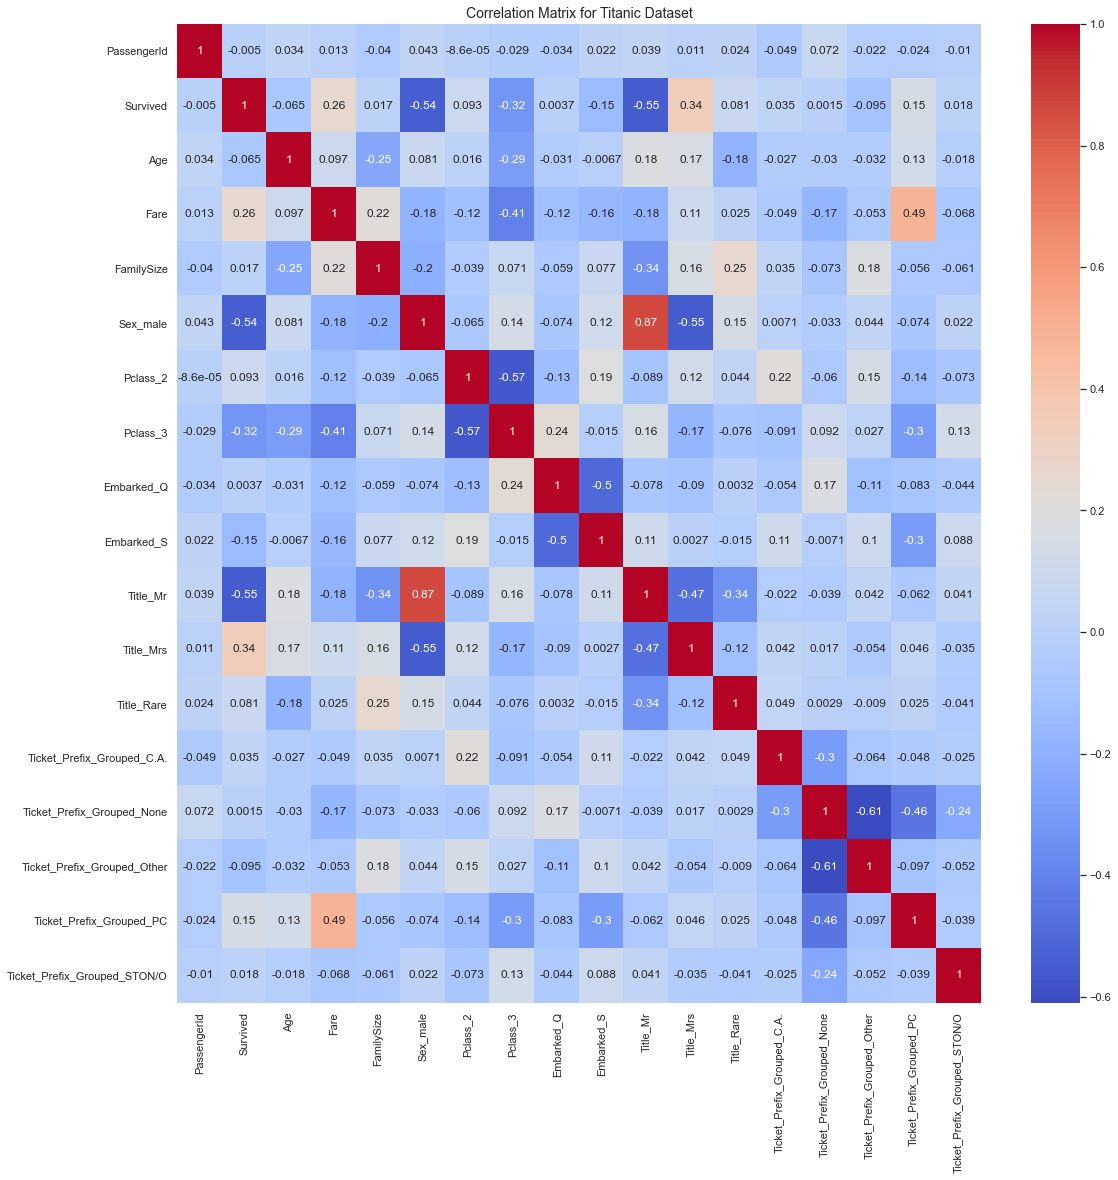

In [2470]:
#check for multicollinearity again 
# Filter for numeric columns only
#numeric_data = titanic_data.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = titanic_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(18, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Titanic Dataset', fontsize=14)
plt.show()

In [2471]:
# 4. Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
titanic_data[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(titanic_data[['Age', 'Fare', 'FamilySize']])
test_data[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(test_data[['Age', 'Fare', 'FamilySize']])


In [ ]:
titanic_data.head(2)

,PassengerId,Survived,Age,Fare,FamilySize,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Title_Mr,Title_Mrs,Title_Rare,Ticket_Prefix_Grouped_C.A.,Ticket_Prefix_Grouped_None,Ticket_Prefix_Grouped_Other,Ticket_Prefix_Grouped_PC,Ticket_Prefix_Grouped_STON/O
0,1,0,-0.565736,-0.502445,0.05916,True,False,True,False,True,True,False,False,False,False,False,False,False
1,2,1,0.663861,0.786845,0.05916,False,False,False,False,False,False,True,False,False,False,False,True,False


In [2473]:
test_data.head(2)
test_data = test_data.drop(columns="Title_Miss", inplace=False)



In [ ]:
#feature Importance.
from sklearn.feature_selection import mutual_info_classif

X = titanic_data.drop(columns=['Survived'])
y = titanic_data['Survived']

mi_scores = mutual_info_classif(X, y)
feature_importance = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print(feature_importance)


Title_Mr                        0.150007
Fare                            0.139737
Sex_male                        0.129310
Title_Mrs                       0.062794
Pclass_3                        0.057743
FamilySize                      0.054335
Embarked_S                      0.038041
Pclass_2                        0.028092
Ticket_Prefix_Grouped_Other     0.017822
Ticket_Prefix_Grouped_C.A.      0.017342
PassengerId                     0.015274
Ticket_Prefix_Grouped_PC        0.013577
Age                             0.011292
Embarked_Q                      0.010801
Title_Rare                      0.010597
Ticket_Prefix_Grouped_None      0.000000
Ticket_Prefix_Grouped_STON/O    0.000000
dtype: float64


### Modeling - Baseline Model(Logistic Regression)

In [2475]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

X = titanic_data.drop(columns=['Survived'])  # Features
y = titanic_data['Survived']  # Target variable

# Split into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=0)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


# Verify the shapes after applying SMOTE
print(f"Balanced training set size: {X_train_balanced.shape}, {y_train_balanced.shape}")

# Now, I can train my model on X_train_balanced and y_train_balanced

Balanced training set size: (888, 17), (888,)


### Train the Model 


In [2476]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report       

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_balanced, y_train_balanced)
log_pred = log_model.predict(X_val)
print("Logistic Regression Accuracy:", accuracy_score(y_val, log_pred))




Logistic Regression Accuracy: 0.7653631284916201


c:\Users\GICHEHA\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluating the baseline model



In [2477]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_val, log_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, log_pred))
print("Classification Report:\n", classification_report(y_val, log_pred))


Accuracy: 0.7653631284916201
Confusion Matrix:
 [[83 22]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       105
           1       0.71      0.73      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



## How the baseline model performed based on the scores above
56 passengers were correctly predicted as 1 - survived - these are the true positives 

83 passengers were correctly predicted that they did not survive - true negatives 

22 passengers were incorrectly predicted to have survived and the ground truth is that they did not survive - false positive

18 passengers were incorrectly predicted to have not survived but in reality they did survive - false negative

### Classification Report
#### Precision
from the class 0 (did not survive) 82% of predictions were correct
From the class 1 (survived) 79% of the predictions were correct

#### Recall 
Class 0 - The model correctly identified 79% of actual class 0 instances
class 1 - The model correctly identified 76% of actual class 1 instances 






#### Iteration II with the important features then compare the scores

In [2478]:
# Select important features
important_features = ['Sex_male', 'Pclass_3', 'Age', 'Title_Mr', 'Pclass_2']
X_train_selected = X_train_balanced[important_features]
X_val_selected = X_val[important_features]

# Train the model
model = LogisticRegression(random_state=42)
model.fit(X_train_selected, y_train_balanced)


LogisticRegression(random_state=42)

In [2479]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_selected, y_train_balanced, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", scores.mean())


Cross-Validation Accuracy: 0.7195454833999874


In [2480]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV


### Evaluating the Decision Tree

In [ ]:
# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_balanced, y_train_balanced)
tree_pred = tree_model.predict(X_val)
print("Decision Tree Accuracy:", accuracy_score(y_val, tree_pred))

Decision Tree Accuracy: 0.7877094972067039


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_val, tree_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, tree_pred))
print("Classification Report:\n", classification_report(y_val, tree_pred))

Accuracy: 0.7877094972067039
Confusion Matrix:
 [[81 24]
 [14 60]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81       105
           1       0.71      0.81      0.76        74

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.79      0.79       179



### Interpretation of the Decision tree Model Scores

#### Accuracy - 0.75 
75.4% of the predictions made by the model were correct. 

#### Confusion Matrix

True Negative - 83  were correctly identified as class 0 - not survived

True Positive - 53 were correctly Identified as class 1 - survived 

False Positive - 22 were incorrectly identified as class 1 - that they survived but the ground truth is that they did not survive

False Negative - 22 were incorrectly identified as class 0 - thay they survived but in real sense they did not 

### Classification Report 

#### Precision -positive prediction value

class 0 - The model was able to correctly predict 79% of the time that a passenger did not survive 

Class 1 - The model is able to predict 70% of the time that a passenger survived

#### Recall(sensitivity)

class 0 - 0.79 : out of all non survivors, the model was able to correctly predict 79% correctly 

class 1 - 0.70 : out of all the survivors, the model was able to correctly identify 70 % of them

#### F1-score

class 0: 0.79 
class 1 : 0.70 


The F1-score balances precision and recall, confirming that the model performs better for class 0 than for class 1.


### Random Forest Model and Evaluation

In [ ]:

from sklearn.ensemble import RandomForestClassifier
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

# Predict on the validation set
y_pred_rf = rf_model.predict(X_val)

# Evaluate performance
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_val, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_rf))
print("Classification Report:\n", classification_report(y_val, y_pred_rf))


Random Forest Classifier:
Accuracy: 0.8491620111731844
Confusion Matrix:
 [[91 14]
 [13 61]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87       105
           1       0.81      0.82      0.82        74

    accuracy                           0.85       179
   macro avg       0.84      0.85      0.84       179
weighted avg       0.85      0.85      0.85       179



### Support Vector Machine (SVM) and Evaluation

In [2484]:
#model 2
from sklearn.svm import SVC
# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_balanced, y_train_balanced)

# Predict on the validation set
y_pred_svm = svm_model.predict(X_val)

# Evaluate performance
print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_score(y_val, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_svm))
print("Classification Report:\n", classification_report(y_val, y_pred_svm))


Support Vector Machine:
Accuracy: 0.5027932960893855
Confusion Matrix:
 [[51 54]
 [35 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.49      0.53       105
           1       0.42      0.53      0.47        74

    accuracy                           0.50       179
   macro avg       0.51      0.51      0.50       179
weighted avg       0.52      0.50      0.51       179



SVM scores are lower compared to the random forest. 

### Gradient Boosting Classifier

In [2485]:
from sklearn.ensemble import GradientBoostingClassifier

# Initiate and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_balanced, y_train_balanced)

# Predict on the validation set
y_pred_gb = gb_model.predict(X_val)

# Evaluate performance
print("\nGradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_val, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_gb))
print("Classification Report:\n", classification_report(y_val, y_pred_gb))



Gradient Boosting Classifier:
Accuracy: 0.7988826815642458
Confusion Matrix:
 [[90 15]
 [21 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



### Recall Scores between the Random Forest Algo and Gradient Boosting

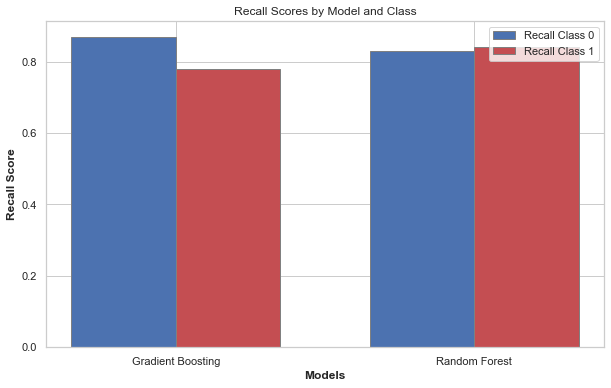

In [ ]:

#compare the recall between Gradient boosting and Random Forest models.
# Model names
models = ['Gradient Boosting', 'Random Forest']

# Recall scores for class 0 and class 1
recall_class_0 = [0.87, 0.83]
recall_class_1 = [0.78, 0.84]

# Bar width
bar_width = 0.35

# Positions of the bars on the x-axis
r1 = range(len(models))
r2 = [x + bar_width for x in r1]

# Create the plot
plt.figure(figsize=(10, 6))

# Bars for class 0 recall
plt.bar(r1, recall_class_0, color='b', width=bar_width, edgecolor='grey', label='Recall Class 0')

# Bars for class 1 recall
plt.bar(r2, recall_class_1, color='r', width=bar_width, edgecolor='grey', label='Recall Class 1')

# Adding labels and title
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Recall Score', fontweight='bold')
plt.title('Recall Scores by Model and Class')
plt.xticks([r + bar_width/2 for r in range(len(models))], models)

# Adding the legend
plt.legend()

# Display the plot
plt.show()



From the barchat above, the project focuses on predicting those who survive(class 1) more - hence the highest recall on class 1 will determine which model to choose. in this case, the random forest model performs better.

### Hyperparameter Tuning

In [ ]:
#Optimize model parameters using techniques like GridSearchCV to enhance predictive performance.
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy',
                           n_jobs=-1 )
grid_search.fit(X_train_balanced, y_train_balanced)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.836824731797118


The scores that are gotten from the hyperparameter tuning(0.84) are less than that of the random forest(0.85)

## Algorithm Selection

### Predict survival on the Test Dataset using the Random Forest Algorithm

In [2488]:

#Step 1
# rf_model' is the trained Random Forest model
# and 'test_data' is the preprocessed test feature set

# Step 2: Make predictions
y_pred = rf_model.predict(test_data)

In [2489]:
print(test_data.columns)


Index(['PassengerId', 'Age', 'Fare', 'FamilySize', 'Sex_male', 'Pclass_2',
       'Pclass_3', 'Embarked_Q', 'Embarked_S', 'Title_Mr', 'Title_Mrs',
       'Title_Rare', 'Ticket_Prefix_Grouped_C.A.',
       'Ticket_Prefix_Grouped_None', 'Ticket_Prefix_Grouped_Other',
       'Ticket_Prefix_Grouped_PC', 'Ticket_Prefix_Grouped_STON/O'],
      dtype='object')


In [2490]:
# Step 3: Create a DataFrame with 'PassengerId' and 'Survived' predictions
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_pred})

# Step 4: Save the DataFrame to a CSV file
output.to_csv('titanic_predictions.csv', index=False)

### Test Model Performance

The score that I was able to get from the Kaggle competition was 0.72. This means that the random forest model was able to predict correctly 72% of the survival rate in the test_csv dataset. 

### Findings 

After analyzing the Titanic dataset, the following findings were drawn:

Average Age of Survivors: Survivors had an average age of approximately 28 years.

Survival Rates by Passenger Class: First-class passengers exhibited higher survival rates, followed by the second class passengers and third class passengers. In specific, 62% of first-class passengers survived, 47% of passengers in second-class survived while only 26% of third class passengers survived. 

Gender-Based Survival: From the analysis, there is a significantly higher proportion of female passengers  who survived than male passengers, 74% of women survived and 18% of men survived from the training dataset provided.

Embarkation Point: Passengers who embarked from Cherbourg ('C') had higher survival rates.

Age Groups and Survival: Children, teenagers, young adults, and adults had higher survival rates compared to seniors.

Fare and Survival: Passengers who paid higher fares tended to have higher survival rates.

### Limitations

Data Completeness: The dataset contains missing values in critical fields such as 'Age', 'Cabin', and 'Embarked'. For instance, the 'Age' column has 263 missing entries, and the 'Cabin' attribute has 1,014 missing values. These gaps can introduce biases, especially if the missing data is not random. 


Sample Representation: The dataset represents a specific historical event with unique circumstances. Models or conclusions derived from this data may not generalize to other maritime disasters or broader contexts, limiting the applicability of findings. 


Feature Relevance: Some features in the dataset, such as 'Passenger Class' and 'Fare', may not directly influence survival outcomes but could be proxies for other underlying factors. Relying solely on these features without understanding their context can lead to misleading interpretations. 


Data Accuracy: There are concerns about potential errors within the dataset, such as inaccuracies in passenger survival status, which can affect the reliability of analyses. 


Historical and Social Biases: The data reflects the societal norms and biases of the early 20th century, including gender and class disparities. These historical biases may not be relevant or ethical to apply in modern analyses or predictive modeling. 


### Next Steps

1. Comparison with Other Datasets: 

Benchmarking: Compare findings with analyses from similar datasets to validate conclusions and identify unique patterns.

2. Reporting and Visualization:

Dashboard Creation: Develop interactive dashboards to present findings and allow stakeholders to explore the data dynamically.

Storytelling: Craft a narrative around the data insights to communicate results effectively to non-technical audiences.

3. Model Building and Evaluation 

Algorithm Selection : use ensemble methods to enhance results

Model Evaluation: Use cross-validation and performance metrics (e.g., accuracy, precision, recall, F1-score) to assess model effectiveness.


## Insights and Recommendations

Analyzing the Titanic disaster provides valuable insights that can inform and enhance modern crisis preparedness, particularly in maritime safety and evacuation protocols. Key findings include:

1. Passenger Class and Survival Rates:

Data indicates that passengers in higher classes had better survival rates. This disparity suggests that socio-economic status influenced access to lifeboats and safety measures. Modern protocols should ensure equitable access to safety equipment and evacuation routes for all passengers, regardless of class or ticket type. 


2. Gender and Age Factors:

The "women and children first" protocol was applied during the Titanic evacuation, leading to higher survival rates among these groups. However, this approach also resulted in the loss of many male passengers. Contemporary evacuation procedures should prioritize individuals based on vulnerability and need, ensuring a balanced and fair approach to saving lives. 


3. Lifeboat Availability and Utilization:

The Titanic was equipped with lifeboats for only about half of those on board, a factor that significantly increased the death toll. Current maritime regulations mandate sufficient lifeboats for all passengers and crew, but regular drills and clear instructions are also essential to ensure efficient use during emergencies. 


4. Communication and Early Warning Systems:

The lack of timely communication about the iceberg threat contributed to the disaster. Implementing advanced early warning systems and ensuring effective communication channels between crew and passengers are crucial for prompt and organized evacuations. 


5. Training and Emergency Preparedness:

Inadequate crew training on emergency procedures led to confusion during the evacuation. Regular and comprehensive training for crew members, along with informative safety briefings for passengers, can improve response times and coordination in crises. 


#### Recommendations for Modern Crisis Preparedness:

* Equitable Safety Measures: Ensure all passengers have equal access to safety equipment and evacuation information, regardless of socio-economic status.

* Inclusive Evacuation Protocols: Develop procedures that consider the needs of all individuals, including the elderly and disabled, to promote fairness in life-saving measures.

* Adequate Resources: Maintain sufficient lifeboats and flotation devices for everyone on board, and conduct regular inspections and maintenance.

* Effective Communication: Utilize modern technology to provide real-time updates and clear instructions to passengers during emergencies.

* Comprehensive Training: Implement ongoing training programs for crew members and informative safety sessions for passengers to enhance overall preparedness.
